20132915 Nam, Geun Woo

[Apply K-means algorithm to both image value and its spatial domain]

For a given input image (either gray or color), apply a K-means algorithm that is designed to take into consideration of both the image intensity and its spatial domain with varying parameters: the number of clusters and the trade-off between the intensity energy and the spatial energy.

The objective function is given by:

$\sum_k \sum_{ x \in I(k) } [ \| f(x) - m_k \|^2 + a * \| x - c_k \|^2 ]$

where $I(k)$ denotes the index set of $x$ that belongs to cluster $k$, $m_k$ denotes the centroid of image intensity for cluster $k$, $c_k$ denotes the centroid of spatial location for cluster $k$, and $a$ determines the importance between the image intensity and the spatial relation.

- Visualize the clustering results with varying $k$ and a using the centroid color $m_k$ for each cluster $k$.

- Visualize the energy curve for both the intensity energy and the spatial energy.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [27]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

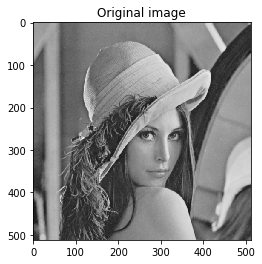

In [239]:
# Read the image file
#img = plt.imread('../../exercise/python/data/tiger.jpeg')
#img_rows = img.shape[0]
#img_cols = img.shape[1]

img = Image.open('../../exercise/python/data/lena.png','r')
img = img.convert('L') #makes it greyscale
img_matrix = np.asarray(img.getdata(),dtype=np.float64).\
reshape((img.size[1],img.size[0]))
img_rows = img_matrix.shape[0]
img_cols = img_matrix.shape[1]
plt.imshow(img_matrix, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")
plt.show()

In [240]:
# Define a K-means clustering function
def KMeans(img_matrix, img_rows, img_cols, K, alpha):
    # K = 5
    # alpha = 0.1

    centroid_row = np.random.randint(0, img_rows, (K, 1))
    centroid_col = np.random.randint(0, img_cols, (K, 1))
    centroid_value = np.random.randint(0, 255, (K, 1))
    centroid = np.hstack([centroid_row, centroid_col, centroid_value])
    centroid_list = []
    label_map = np.zeros((img_rows, img_cols))
    energy_list = []
    energy_list_spatial = []
    energy_list_intensity = []

    # K-Means clustering by L2 norm
    distance_list = []
    distance_list_spatial = []
    distance_list_intensity = []
    count_list = np.zeros((K))

    for iteration in range(0, 10):
        energy = 0
        energy_spatial = 0
        energy_intensity = 0
        for i in range(0, img_rows):
            for j in range(0, img_cols):
                # Compare the distance with each centroid.
                for iterator in range(0, K):
                    distance_list.append\
                    ((img_matrix[i,j]-centroid[iterator,2])**2+\
                     alpha*((i-centroid[iterator,0])**2+\
                     (j-centroid[iterator,1])**2))
                    distance_list_spatial.append\
                    ((i-centroid[iterator,0])**2+\
                     (j-centroid[iterator,1])**2)
                    distance_list_intensity.append\
                    ((img_matrix[i,j]-centroid[iterator,2])**2+\
                     alpha*((i-centroid[iterator,0])**2))
                # Choose the label that has the minimum distance
                # and update the label.
                label_map[i][j] = np.argmin(distance_list)
                energy += (np.min(distance_list))
                energy_spatial += (np.min(distance_list_spatial))
                energy_intensity += (np.min(distance_list_intensity))
                # Re-initialize distance_list
                distance_list = []
                distance_list_spatial = []
                distance_list_intensity = []


        # Update the energy list
        energy_list.append(energy)
        energy_list_spatial.append(energy_spatial)
        energy_list_intensity.append(energy_intensity)
        # Update centroids.
        centroid.fill(0)
        # Iterate through the image label map matrix.
        for i in range(0, img_rows):
            for j in range(0, img_cols):
                centroid[int(label_map[i][j]),0] += i
                centroid[int(label_map[i][j]),1] += j
                centroid[int(label_map[i][j]),2] += img_matrix[i][j]
                count_list[int(label_map[i][j])] += 1

        centroid[:,0] = np.true_divide(centroid[:,0], count_list)
        centroid[:,1] = np.true_divide(centroid[:,1], count_list)
        centroid[:,2] = np.true_divide(centroid[:,2], count_list)

        # Reinitialize count_list
        count_list.fill(0)

        centroid_list.append(centroid)

        print("%d th iteration" % iteration)



        # Visualize image
        plt_sub = plt.subplot(2, 5, iteration+1)
        plt_sub.title.set_text("Iteration %d" % iteration)
        plt_sub.imshow(label_map,cmap='tab20')
        # Visualize spatial centroids
        # plt_sub.scatter(centroid[:,0], centroid[:,1], c='b')
    plt.suptitle("K = %d, alpha = %.2f" % (K, alpha))
    plt.show()
    
    # Plot the total energy graph    
    plt.title("Total Energy graph")
    plt.xlabel("Iteration")
    plt.ylabel("Energy")
    plt.plot(energy_list)
    plt.show()
    
    # Plot the spatial energy graph    
    plt.title("Spatial Energy graph")
    plt.xlabel("Iteration")
    plt.ylabel("Energy")
    plt.plot(energy_list_spatial)
    plt.show()
    
    # Plot the intensity energy graph    
    plt.title("Intensity Energy graph")
    plt.xlabel("Iteration")
    plt.ylabel("Energy")
    plt.plot(energy_list_intensity)
    plt.show()

# K = 3

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


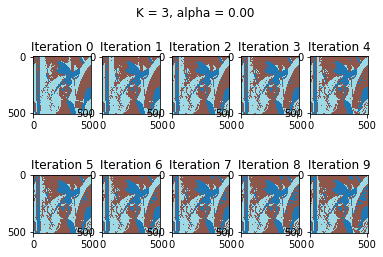

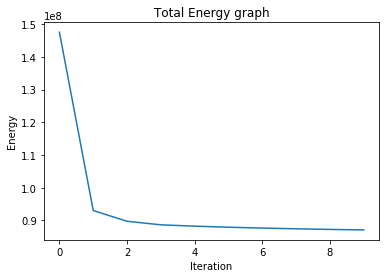

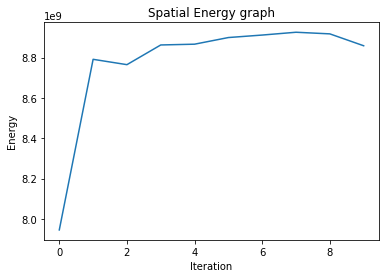

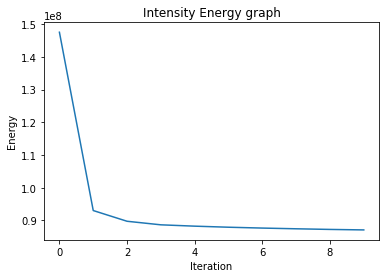

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


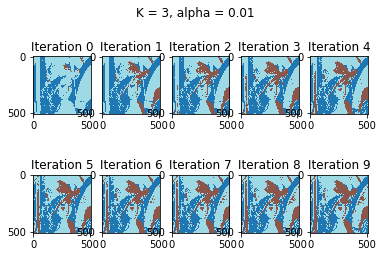

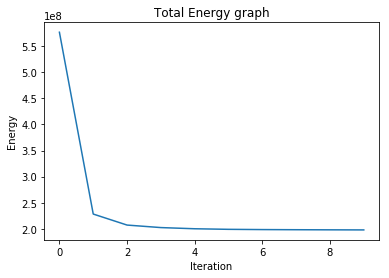

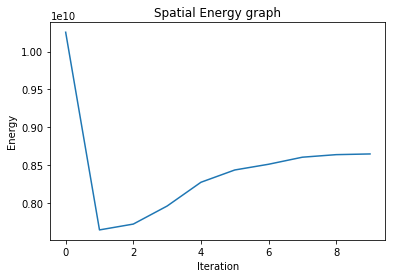

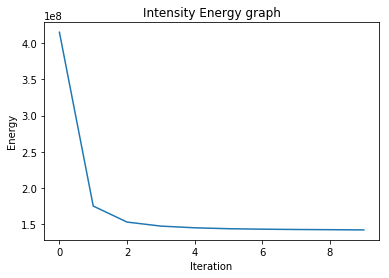

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


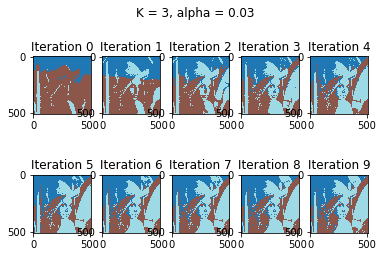

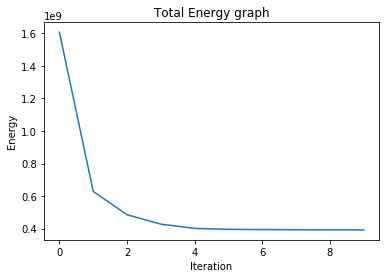

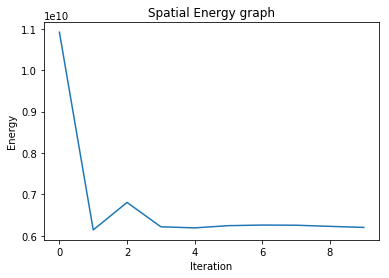

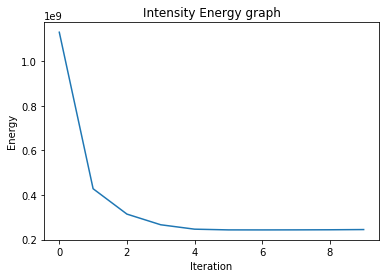

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


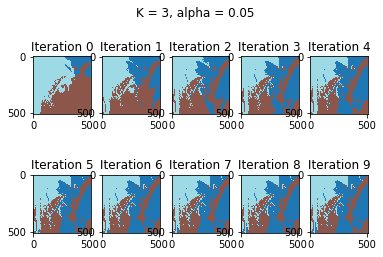

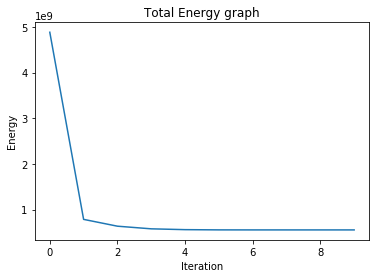

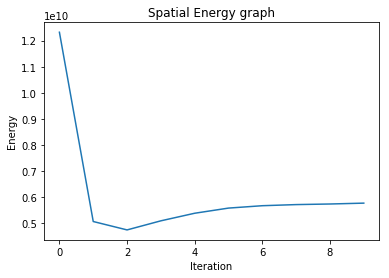

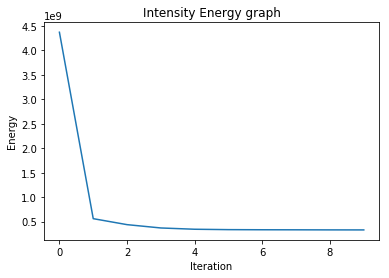

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


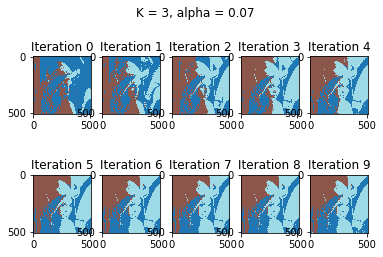

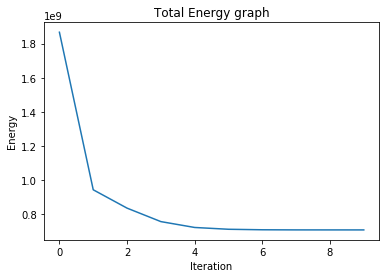

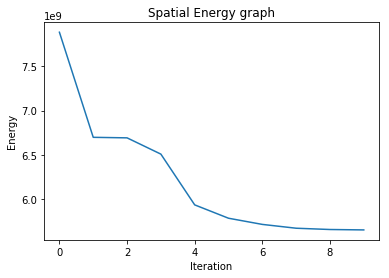

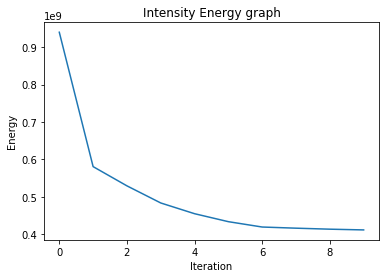

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


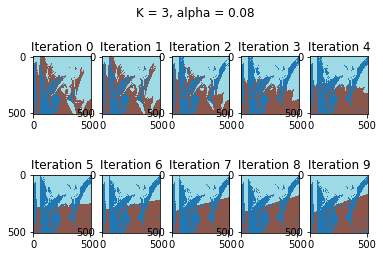

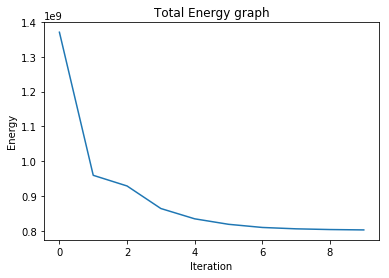

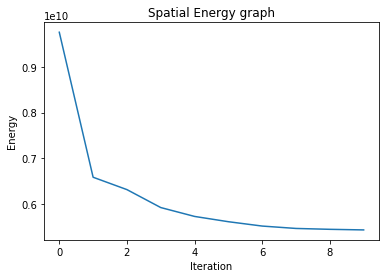

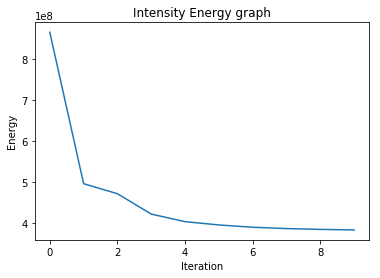

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


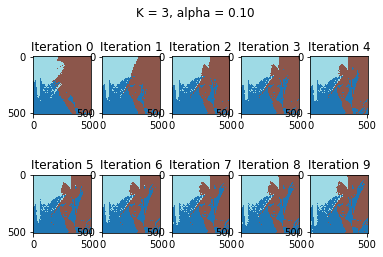

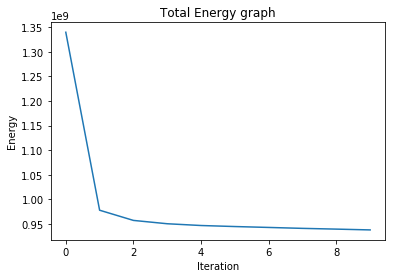

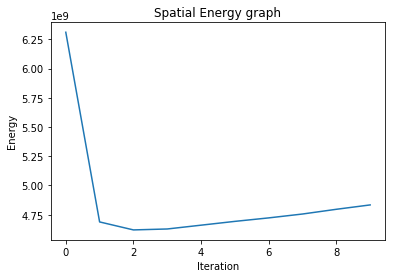

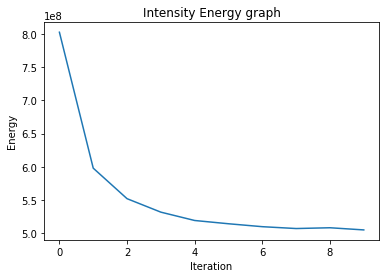

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


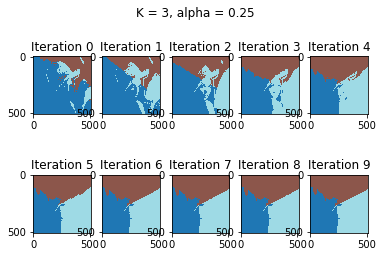

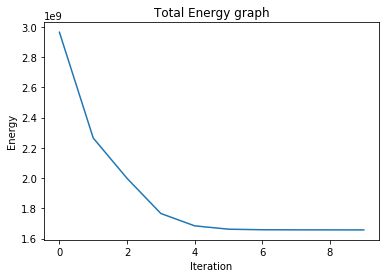

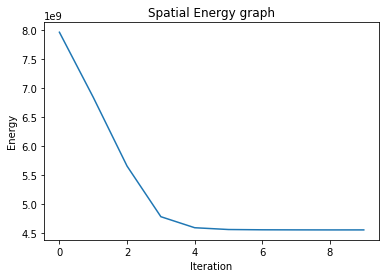

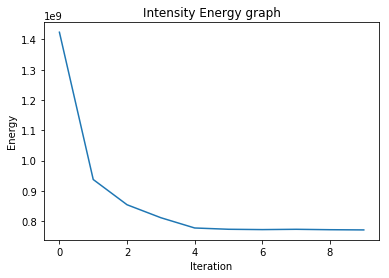

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


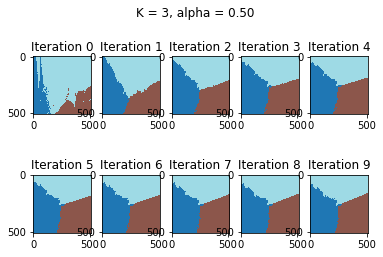

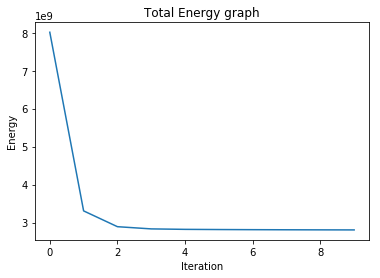

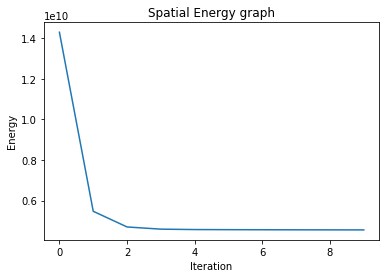

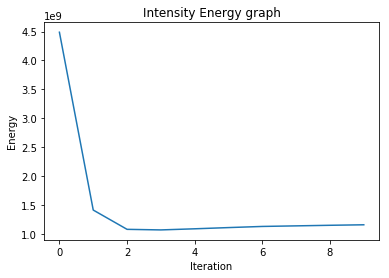

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


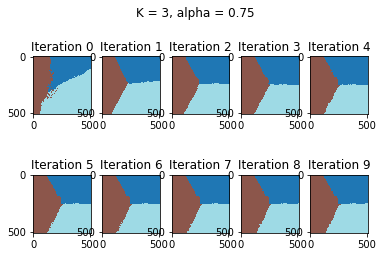

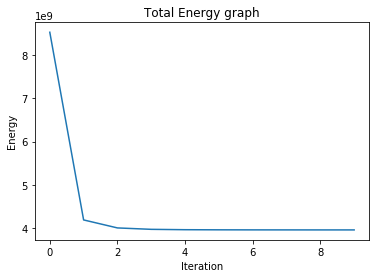

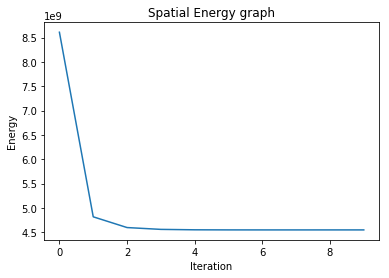

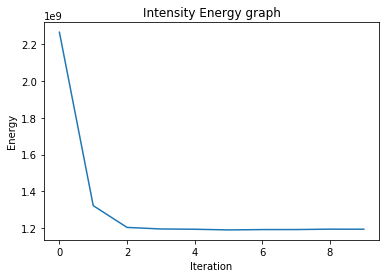

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


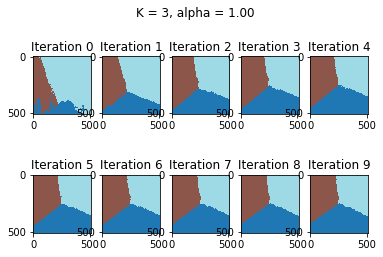

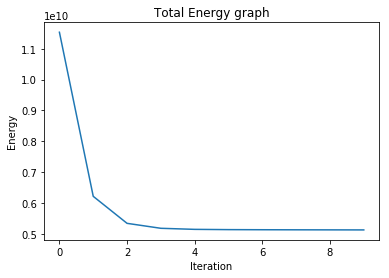

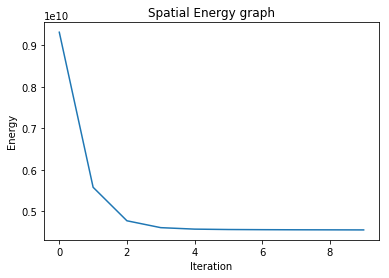

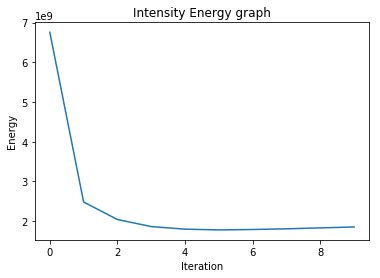

In [242]:
K = 3
KMeans(img_matrix, img_rows, img_cols, K, 0)
KMeans(img_matrix, img_rows, img_cols, K, 0.01)
KMeans(img_matrix, img_rows, img_cols, K, 0.03)
KMeans(img_matrix, img_rows, img_cols, K, 0.05)
KMeans(img_matrix, img_rows, img_cols, K, 0.07)
KMeans(img_matrix, img_rows, img_cols, K, 0.08)
KMeans(img_matrix, img_rows, img_cols, K, 0.10)
KMeans(img_matrix, img_rows, img_cols, K, 0.25)
KMeans(img_matrix, img_rows, img_cols, K, 0.50)
KMeans(img_matrix, img_rows, img_cols, K, 0.75)
KMeans(img_matrix, img_rows, img_cols, K, 1)

# K = 5

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


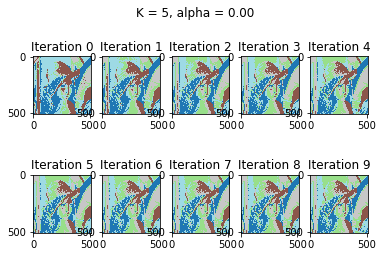

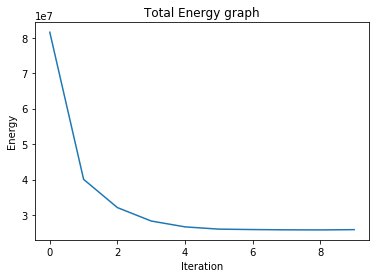

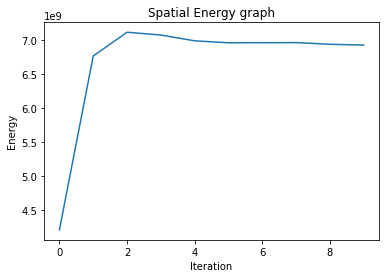

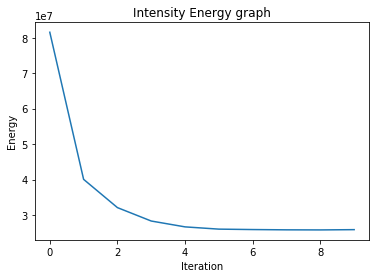

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


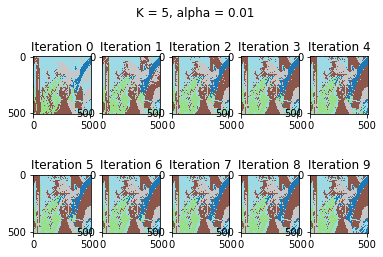

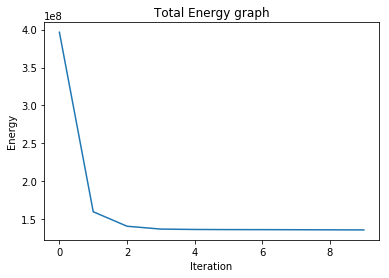

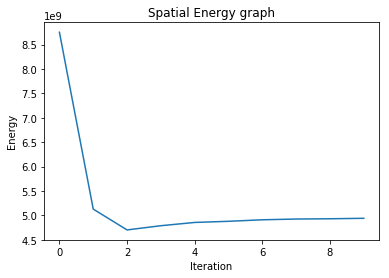

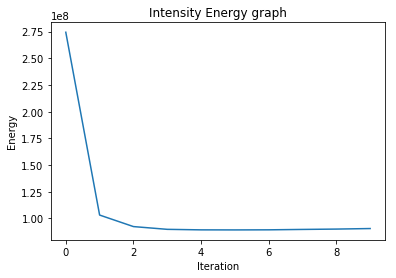

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


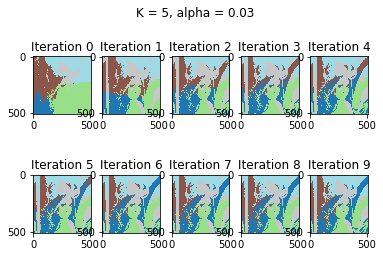

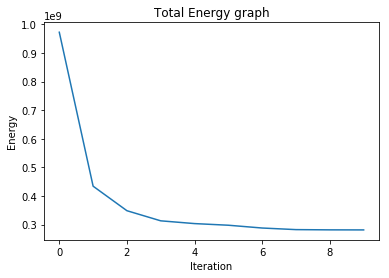

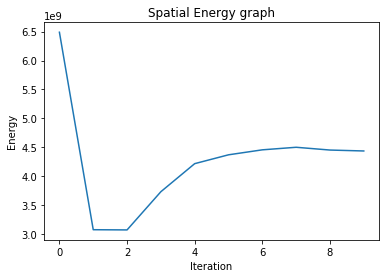

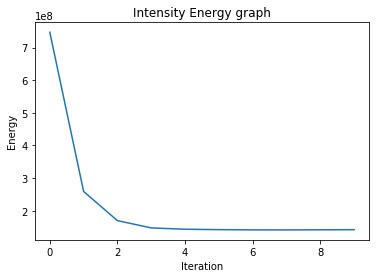

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


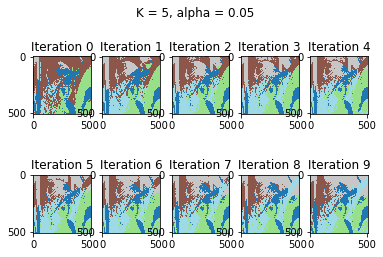

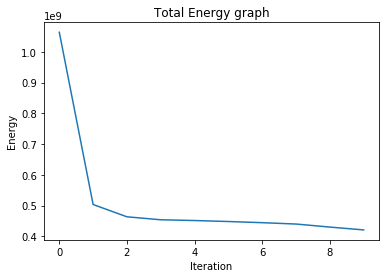

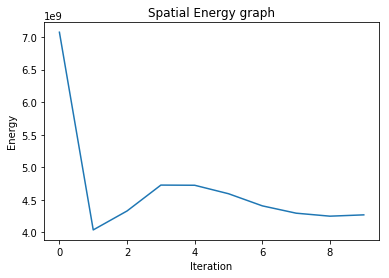

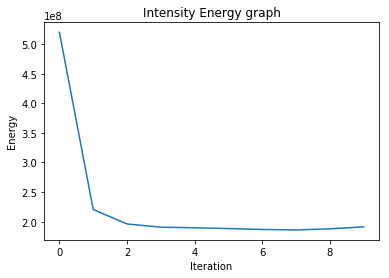

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


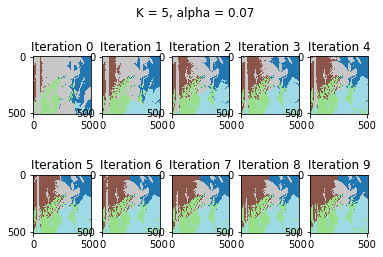

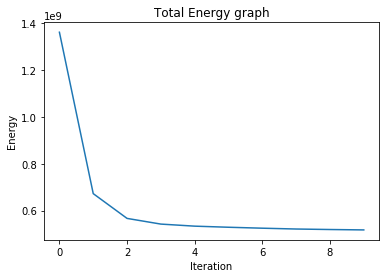

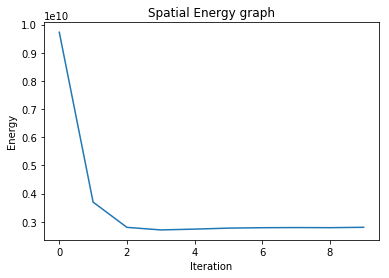

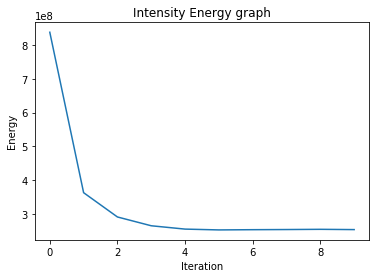

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


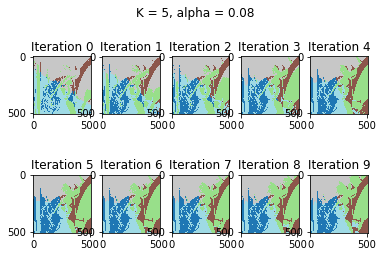

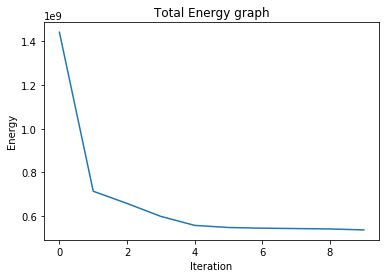

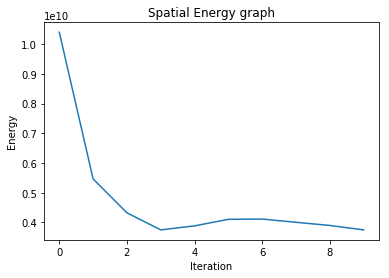

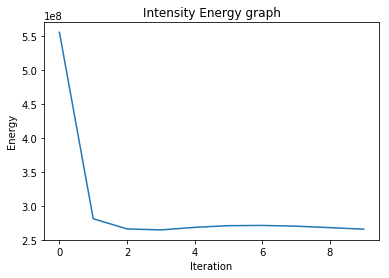

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


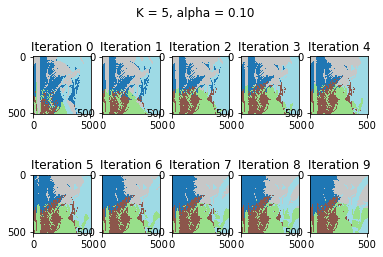

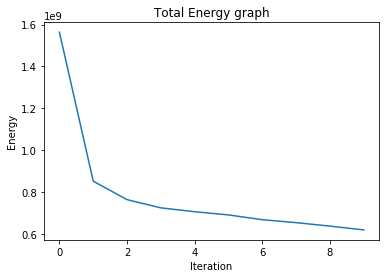

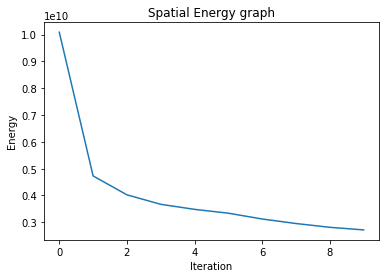

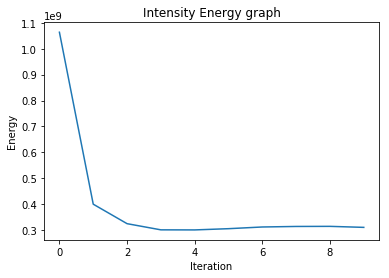

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


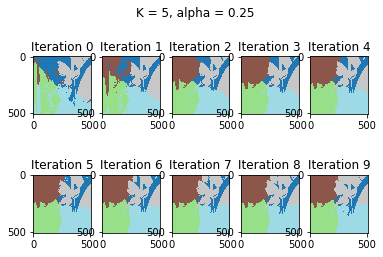

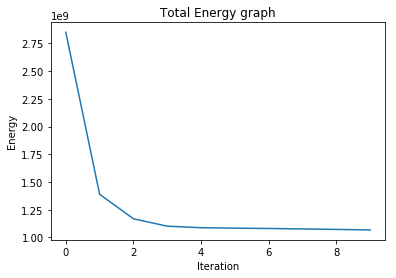

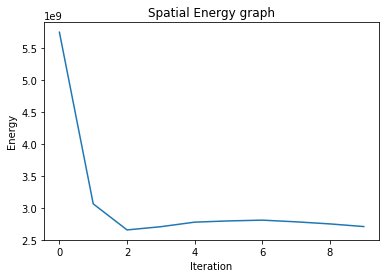

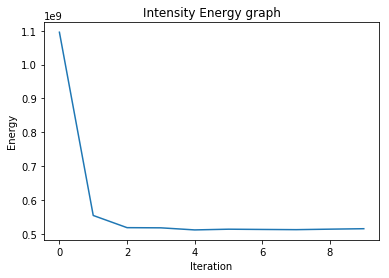

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


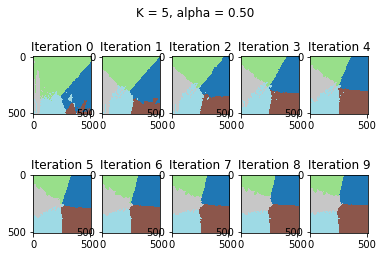

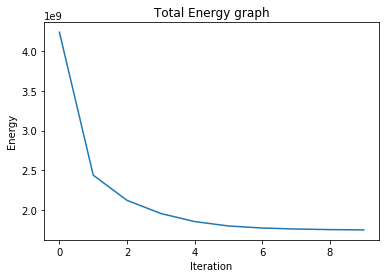

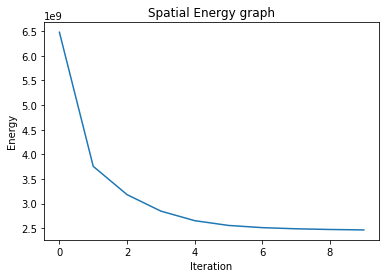

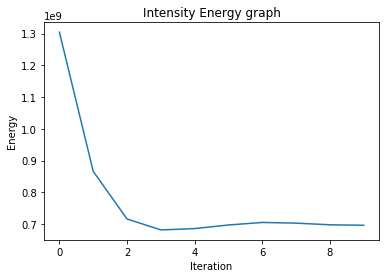

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


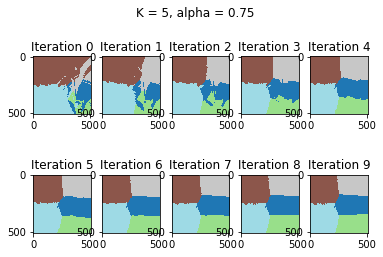

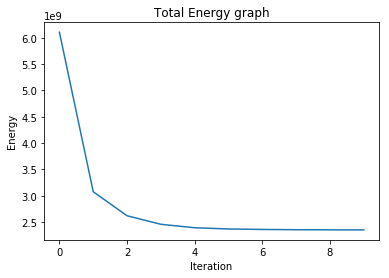

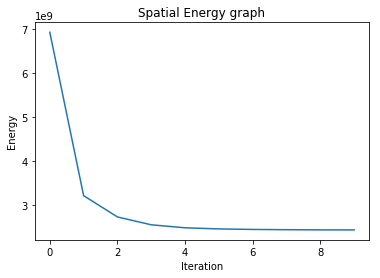

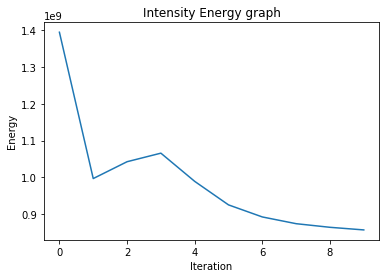

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


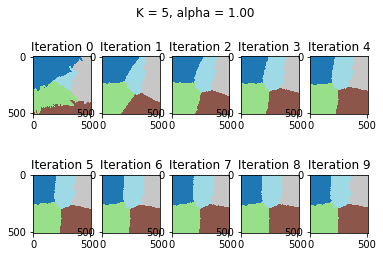

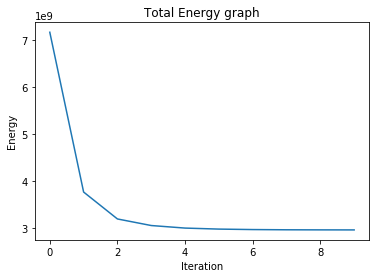

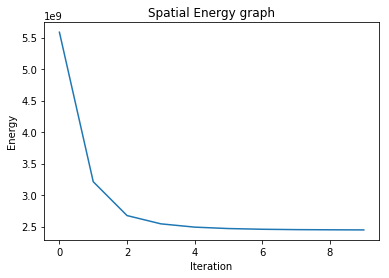

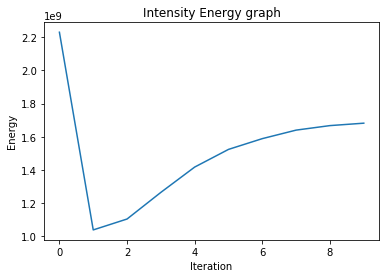

In [243]:
K = 5
KMeans(img_matrix, img_rows, img_cols, K, 0)
KMeans(img_matrix, img_rows, img_cols, K, 0.01)
KMeans(img_matrix, img_rows, img_cols, K, 0.03)
KMeans(img_matrix, img_rows, img_cols, K, 0.05)
KMeans(img_matrix, img_rows, img_cols, K, 0.07)
KMeans(img_matrix, img_rows, img_cols, K, 0.08)
KMeans(img_matrix, img_rows, img_cols, K, 0.10)
KMeans(img_matrix, img_rows, img_cols, K, 0.25)
KMeans(img_matrix, img_rows, img_cols, K, 0.50)
KMeans(img_matrix, img_rows, img_cols, K, 0.75)
KMeans(img_matrix, img_rows, img_cols, K, 1)

# K = 8

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


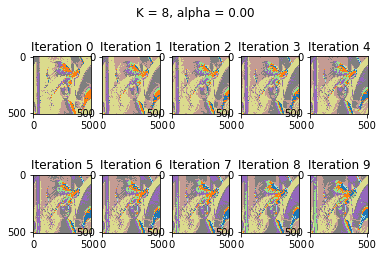

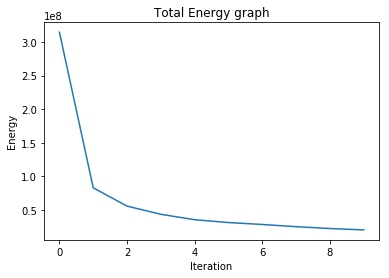

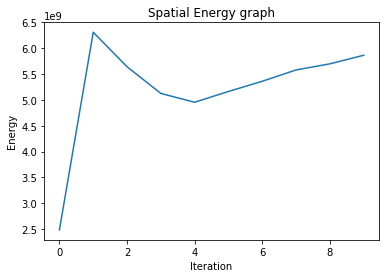

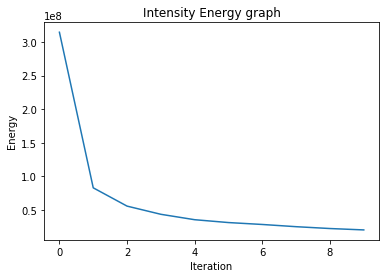

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


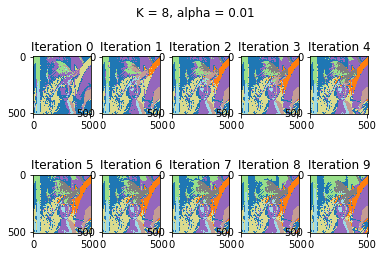

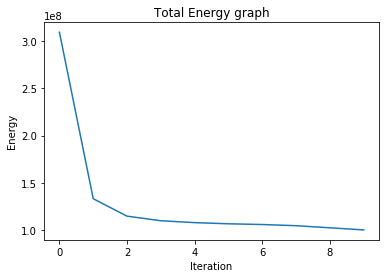

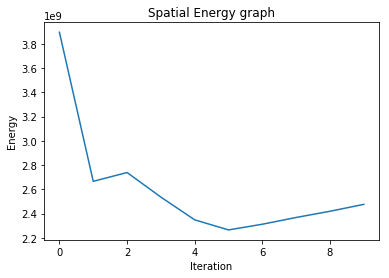

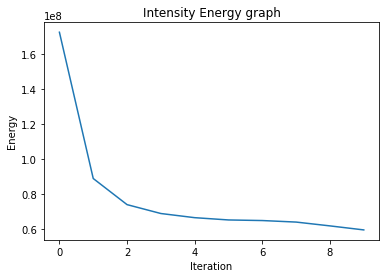

/home/nam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in true_divide
/home/nam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in true_divide
/home/nam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in true_divide
/home/nam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in long_scalars
/home/nam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in long_scalars
/home/nam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in long_scalars
/home/nam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in long_scalars
/home/nam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow 

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


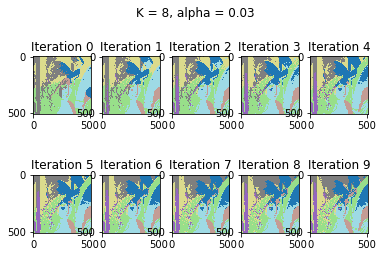

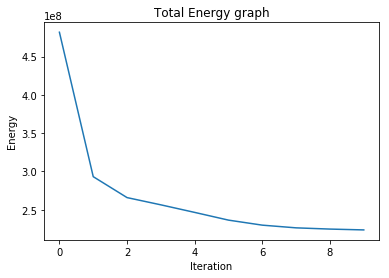

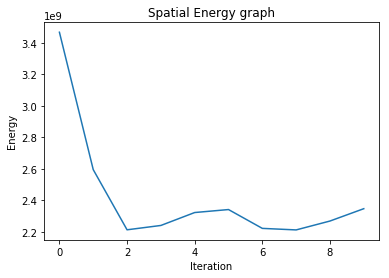

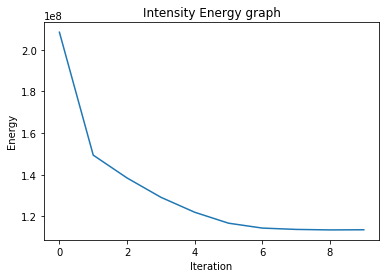

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


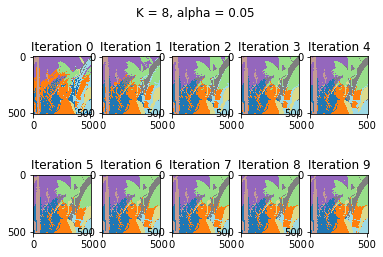

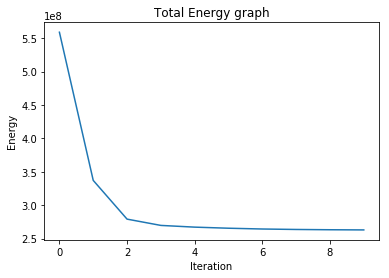

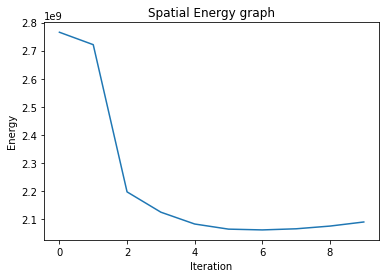

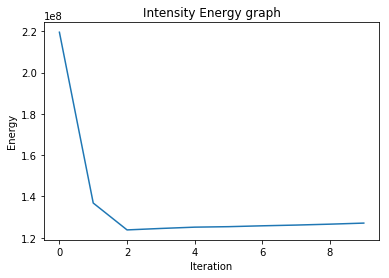

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


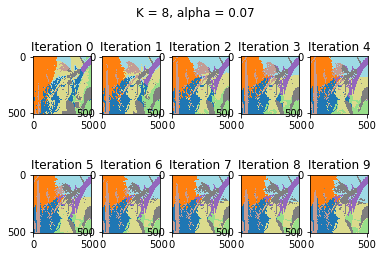

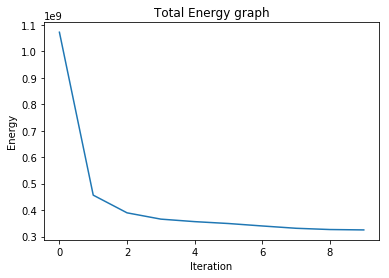

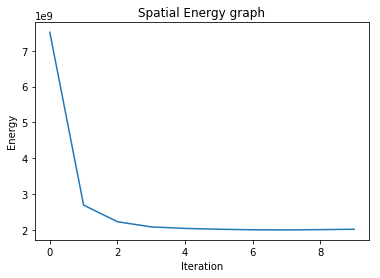

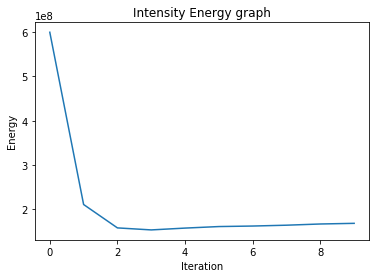

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


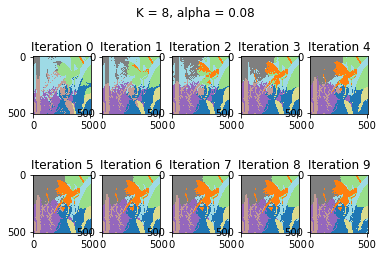

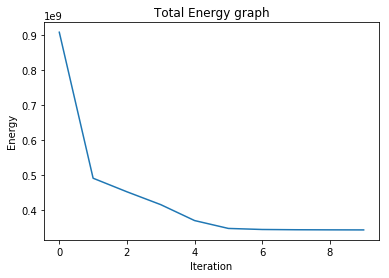

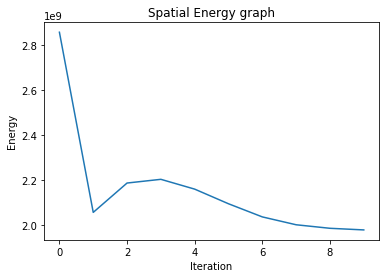

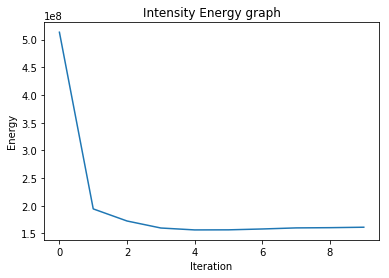

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


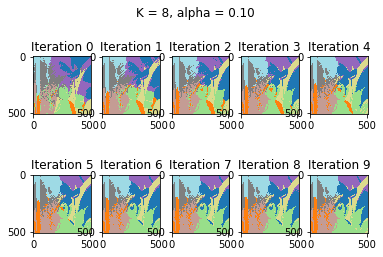

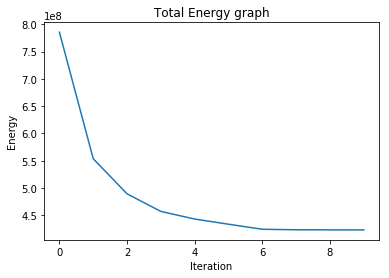

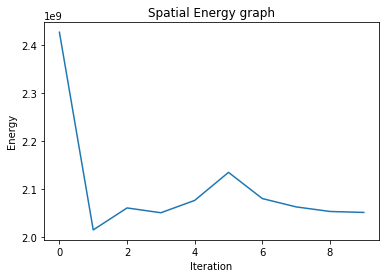

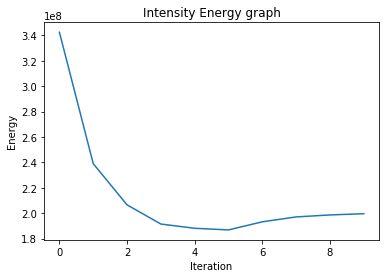

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


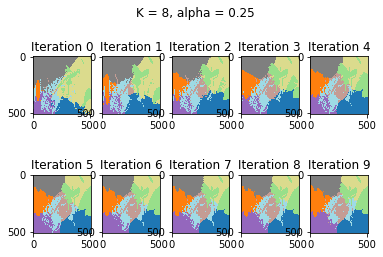

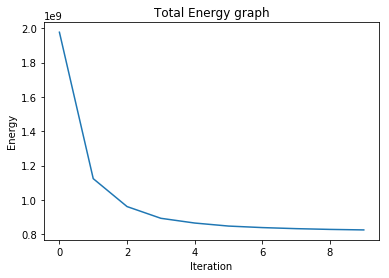

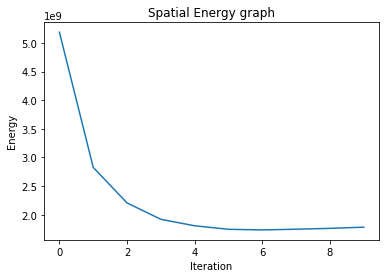

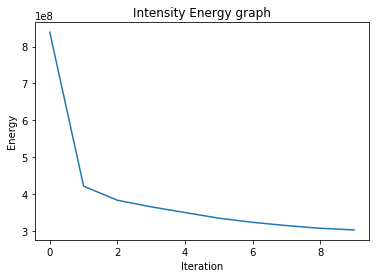

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


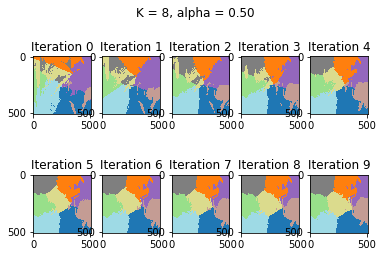

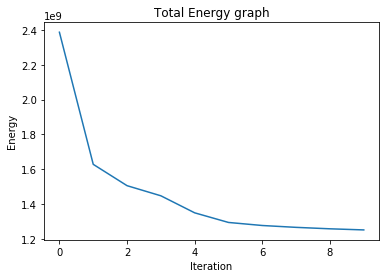

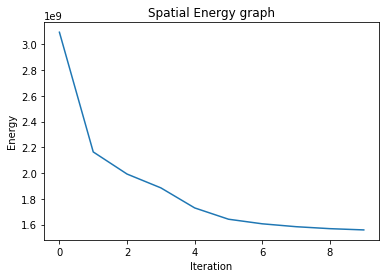

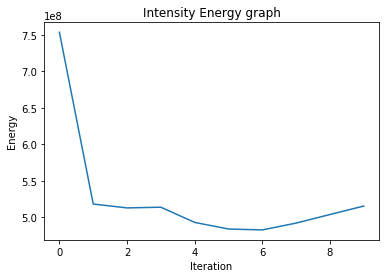

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


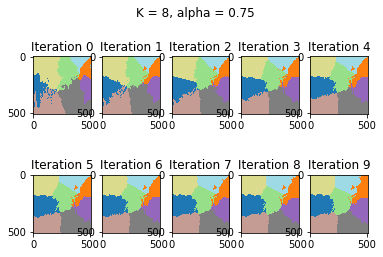

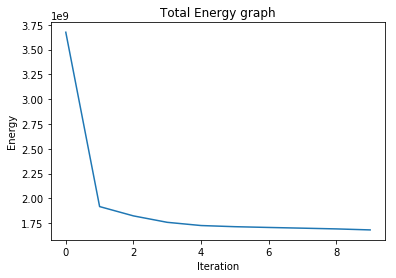

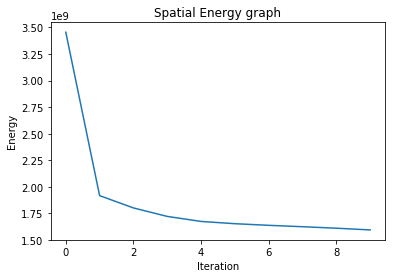

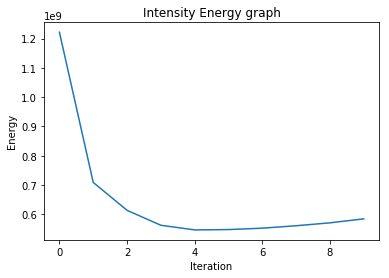

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


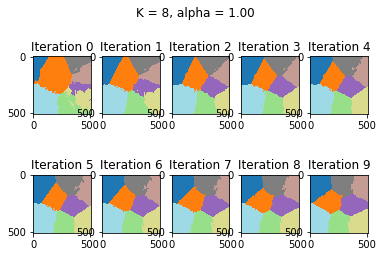

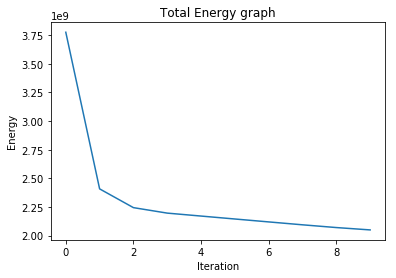

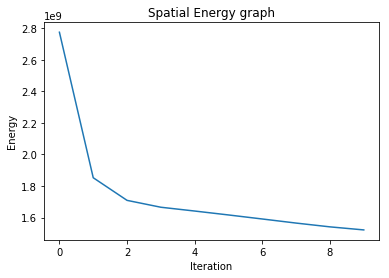

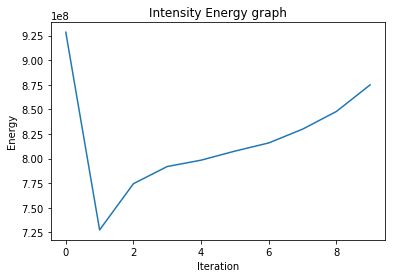

In [244]:
K = 8
KMeans(img_matrix, img_rows, img_cols, K, 0)
KMeans(img_matrix, img_rows, img_cols, K, 0.01)
KMeans(img_matrix, img_rows, img_cols, K, 0.03)
KMeans(img_matrix, img_rows, img_cols, K, 0.05)
KMeans(img_matrix, img_rows, img_cols, K, 0.07)
KMeans(img_matrix, img_rows, img_cols, K, 0.08)
KMeans(img_matrix, img_rows, img_cols, K, 0.10)
KMeans(img_matrix, img_rows, img_cols, K, 0.25)
KMeans(img_matrix, img_rows, img_cols, K, 0.50)
KMeans(img_matrix, img_rows, img_cols, K, 0.75)
KMeans(img_matrix, img_rows, img_cols, K, 1)

# K = 10

/home/nam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in true_divide
/home/nam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in true_divide
/home/nam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in true_divide
/home/nam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in long_scalars
/home/nam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in long_scalars
/home/nam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in long_scalars
/home/nam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in long_scalars
/home/nam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow 

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


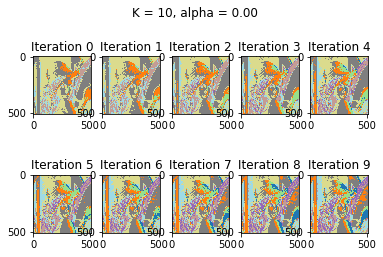

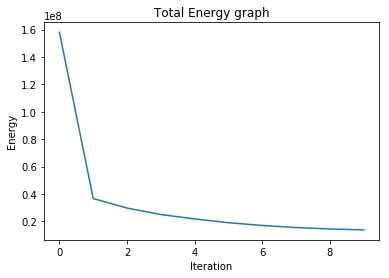

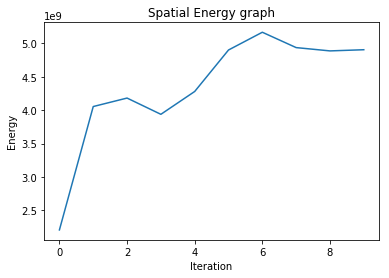

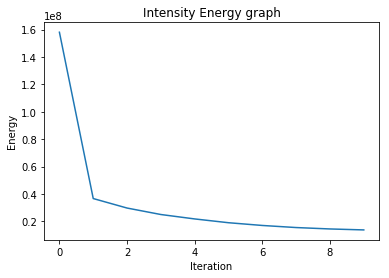

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


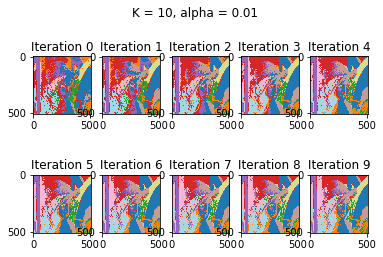

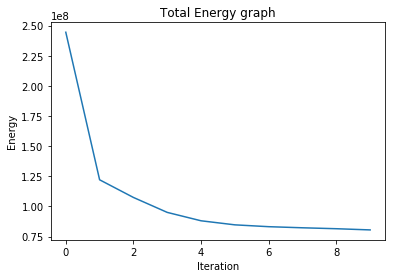

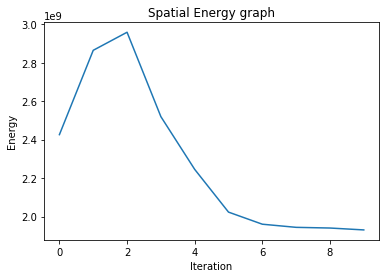

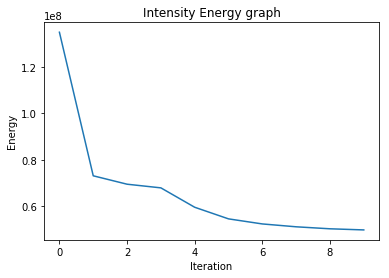

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


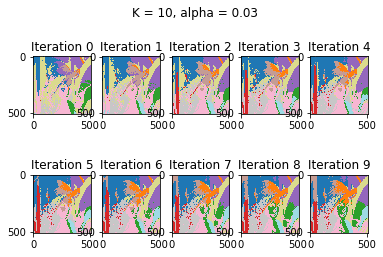

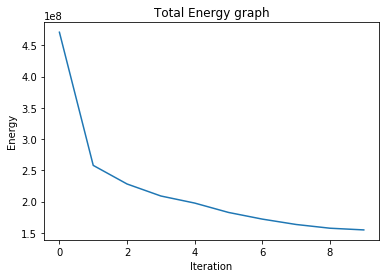

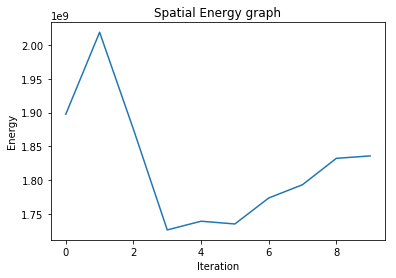

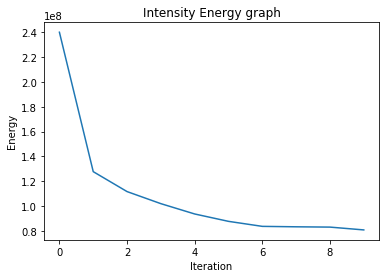

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


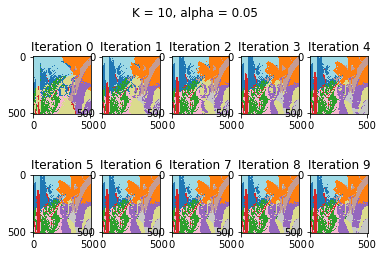

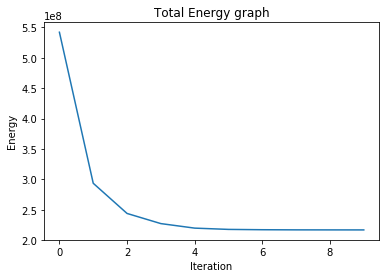

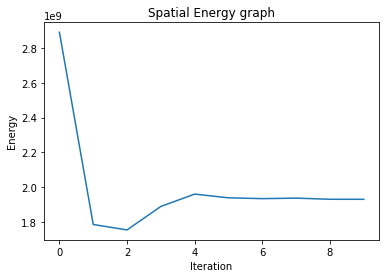

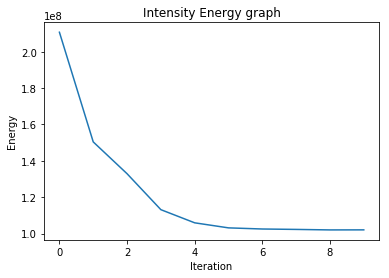

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


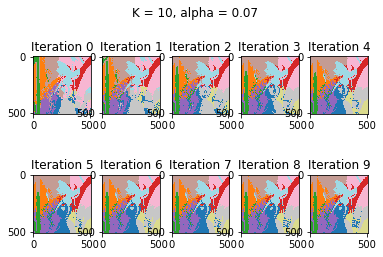

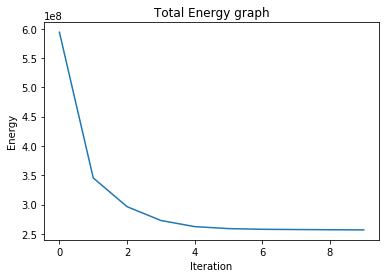

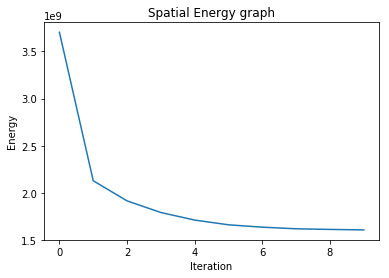

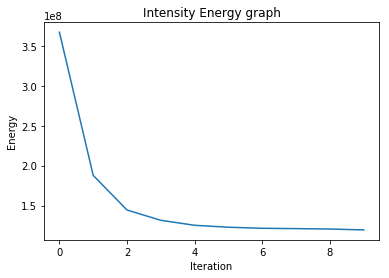

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


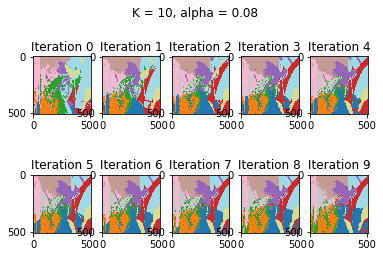

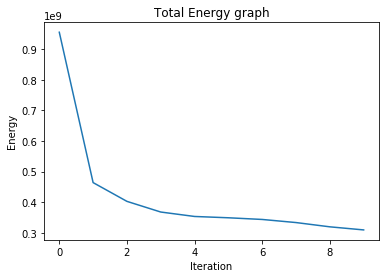

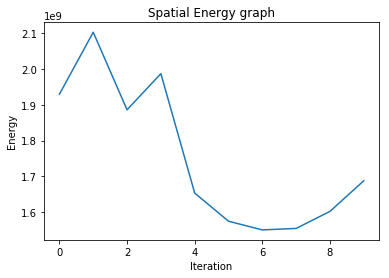

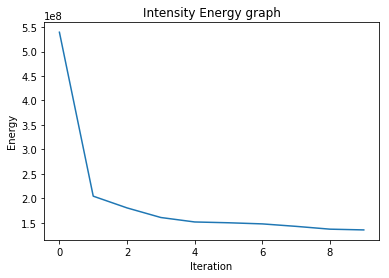

0 th iteration
1 th iteration
2 th iteration
3 th iteration
4 th iteration
5 th iteration
6 th iteration
7 th iteration
8 th iteration
9 th iteration


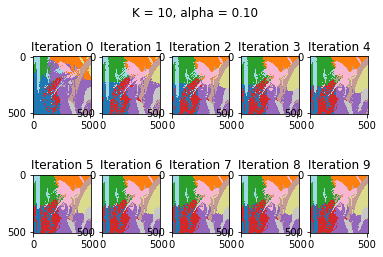

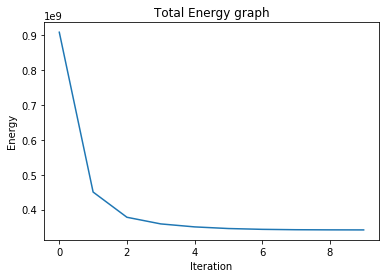

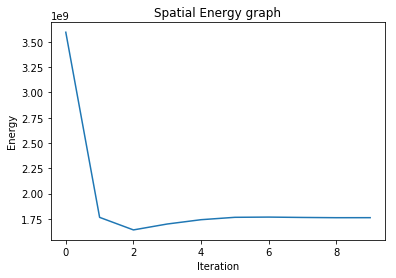

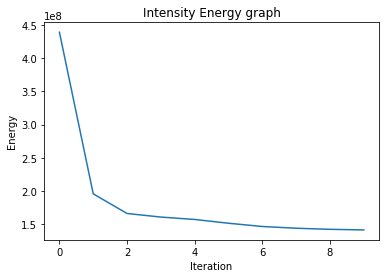

0 th iteration
1 th iteration
2 th iteration
3 th iteration


In [ ]:
K = 10
KMeans(img_matrix, img_rows, img_cols, K, 0)
KMeans(img_matrix, img_rows, img_cols, K, 0.01)
KMeans(img_matrix, img_rows, img_cols, K, 0.03)
KMeans(img_matrix, img_rows, img_cols, K, 0.05)
KMeans(img_matrix, img_rows, img_cols, K, 0.07)
KMeans(img_matrix, img_rows, img_cols, K, 0.08)
KMeans(img_matrix, img_rows, img_cols, K, 0.10)
KMeans(img_matrix, img_rows, img_cols, K, 0.25)
KMeans(img_matrix, img_rows, img_cols, K, 0.50)
KMeans(img_matrix, img_rows, img_cols, K, 0.75)
KMeans(img_matrix, img_rows, img_cols, K, 1)

# K = 15

In [ ]:
K = 15
KMeans(img_matrix, img_rows, img_cols, K, 0)
KMeans(img_matrix, img_rows, img_cols, K, 0.01)
KMeans(img_matrix, img_rows, img_cols, K, 0.03)
KMeans(img_matrix, img_rows, img_cols, K, 0.05)
KMeans(img_matrix, img_rows, img_cols, K, 0.07)
KMeans(img_matrix, img_rows, img_cols, K, 0.08)
KMeans(img_matrix, img_rows, img_cols, K, 0.10)
KMeans(img_matrix, img_rows, img_cols, K, 0.25)
KMeans(img_matrix, img_rows, img_cols, K, 0.50)
KMeans(img_matrix, img_rows, img_cols, K, 0.75)
KMeans(img_matrix, img_rows, img_cols, K, 1)

# K = 20

In [ ]:
K = 20
KMeans(img_matrix, img_rows, img_cols, K, 0)
KMeans(img_matrix, img_rows, img_cols, K, 0.01)
KMeans(img_matrix, img_rows, img_cols, K, 0.03)
KMeans(img_matrix, img_rows, img_cols, K, 0.05)
KMeans(img_matrix, img_rows, img_cols, K, 0.07)
KMeans(img_matrix, img_rows, img_cols, K, 0.08)
KMeans(img_matrix, img_rows, img_cols, K, 0.10)
KMeans(img_matrix, img_rows, img_cols, K, 0.25)
KMeans(img_matrix, img_rows, img_cols, K, 0.50)
KMeans(img_matrix, img_rows, img_cols, K, 0.75)
KMeans(img_matrix, img_rows, img_cols, K, 1)

# K = 25

In [ ]:
K = 25
KMeans(img_matrix, img_rows, img_cols, K, 0)
KMeans(img_matrix, img_rows, img_cols, K, 0.01)
KMeans(img_matrix, img_rows, img_cols, K, 0.03)
KMeans(img_matrix, img_rows, img_cols, K, 0.05)
KMeans(img_matrix, img_rows, img_cols, K, 0.07)
KMeans(img_matrix, img_rows, img_cols, K, 0.08)
KMeans(img_matrix, img_rows, img_cols, K, 0.10)
KMeans(img_matrix, img_rows, img_cols, K, 0.25)
KMeans(img_matrix, img_rows, img_cols, K, 0.50)
KMeans(img_matrix, img_rows, img_cols, K, 0.75)
KMeans(img_matrix, img_rows, img_cols, K, 1)

# K = 50

In [ ]:
K = 50
KMeans(img_matrix, img_rows, img_cols, K, 0)
KMeans(img_matrix, img_rows, img_cols, K, 0.01)
KMeans(img_matrix, img_rows, img_cols, K, 0.03)
KMeans(img_matrix, img_rows, img_cols, K, 0.05)
KMeans(img_matrix, img_rows, img_cols, K, 0.07)
KMeans(img_matrix, img_rows, img_cols, K, 0.08)
KMeans(img_matrix, img_rows, img_cols, K, 0.10)
KMeans(img_matrix, img_rows, img_cols, K, 0.25)
KMeans(img_matrix, img_rows, img_cols, K, 0.50)
KMeans(img_matrix, img_rows, img_cols, K, 0.75)
KMeans(img_matrix, img_rows, img_cols, K, 1)

# K = 100

In [ ]:
K = 100
KMeans(img_matrix, img_rows, img_cols, K, 0)
KMeans(img_matrix, img_rows, img_cols, K, 0.01)
KMeans(img_matrix, img_rows, img_cols, K, 0.03)
KMeans(img_matrix, img_rows, img_cols, K, 0.05)
KMeans(img_matrix, img_rows, img_cols, K, 0.07)
KMeans(img_matrix, img_rows, img_cols, K, 0.08)
KMeans(img_matrix, img_rows, img_cols, K, 0.10)
KMeans(img_matrix, img_rows, img_cols, K, 0.25)
KMeans(img_matrix, img_rows, img_cols, K, 0.50)
KMeans(img_matrix, img_rows, img_cols, K, 0.75)
KMeans(img_matrix, img_rows, img_cols, K, 1)